In [1]:
pip install scikit-plot


Note: you may need to restart the kernel to use updated packages.


# Model 2 assists people in searching for a job.

 

In [2]:
import pandas as pd
import numpy as np
import re
import string
import heapq
import nltk 
import matplotlib.pyplot as plt
import string


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from nltk.tokenize import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer

from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

toktok = ToktokTokenizer()
lemma = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
 
    
nltk.download('stopwords')
nltk.download('punkt')
#mosad

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df=pd.read_csv('dice_com-job_us_sample.csv')
df.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7


In [4]:
df.shape

(22000, 12)

In [5]:
df.columns

Index(['advertiserurl', 'company', 'employmenttype_jobstatus',
       'jobdescription', 'jobid', 'joblocation_address', 'jobtitle',
       'postdate', 'shift', 'site_name', 'skills', 'uniq_id'],
      dtype='object')

In [6]:
df.isnull().sum()
df.isnull().sum().sum()

19193

In [7]:
df=df.fillna(' ')
df.isnull().sum()

advertiserurl               0
company                     0
employmenttype_jobstatus    0
jobdescription              0
jobid                       0
joblocation_address         0
jobtitle                    0
postdate                    0
shift                       0
site_name                   0
skills                      0
uniq_id                     0
dtype: int64

In [8]:
# Drop multiple columns postdata + shift + sitename+ uniq_id+jopid
columns_to_drop = ['shift','postdate', 'site_name','uniq_id','jobid']
df = df.drop(columns=columns_to_drop, axis=1)

In [9]:
df

,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,"Atlanta, GA",AUTOMATION TEST ENGINEER,SEE BELOW
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo..."
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,"Enterprise Solutions Architecture, business in..."
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",Please see job description
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,"Configuration Management, Developer, Linux, Ma..."
...,...,...,...,...,...,...,...
21995,https://www.dice.com/jobs/detail/Web-Designer-...,IAC Publishing,Full Time,Company Description We are searching for a ta...,"Oakland, CA",Web Designer,"UI/UX mobile apps, interaction design, digital..."
21996,https://www.dice.com/jobs/detail/Senior-Front-...,Omega Solutions Inc,Full Time,CONTACT - priya@omegasolutioninc.com / 408-45...,"San Francisco, CA",Senior Front End Web Developer - Full Time at ...,"JavaScript, HTML5, CSS3, Bootstrap, AJAX, Reac..."
21997,https://www.dice.com/jobs/detail/QA-Analyst-Sa...,San Francisco Health Plan,Full Time,Do you take pride in your work knowing that th...,"San Francisco, CA",QA Analyst,"SDLC, ALM, SQL, T-SQL, RedGate, Team Foundatio..."
21998,https://www.dice.com/jobs/detail/Tech-Lead%252...,IAC Publishing,Full Time,Company Description What We Can Offer YouAs th...,"Oakland, CA",Tech Lead-Full Stack,"Python, Ruby, Go, Clojure, Java, NoSQL-Databas..."


In [10]:
#remove duplicates
df.drop_duplicates
df.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,"Atlanta, GA",AUTOMATION TEST ENGINEER,SEE BELOW
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo..."
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,"Enterprise Solutions Architecture, business in..."
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",Please see job description
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,"Configuration Management, Developer, Linux, Ma..."


In [11]:
#drop all rows that have any NaN values
df.dropna(inplace=True)
df.isna().sum()


advertiserurl               0
company                     0
employmenttype_jobstatus    0
jobdescription              0
joblocation_address         0
jobtitle                    0
skills                      0
dtype: int64

In [12]:
# Get index of all rows in 'skills' that contain the value "Null"
jobNull = df[df['skills'] == 'Null'].index

# Get index of rows with specific job descriptions
jobDesc1 = df[df['skills'].isin(['Please see job description', '(see Job Description)', 'See Below', 'Telecommuting not available Travel not required', 'Refer to Job Description', 'Please see Required skills'])].index

# Correcting typos in the drop statements
df.drop(jobNull, inplace=True)
df.drop(jobDesc1, inplace=True)


# Data Visualization of the data 

In [13]:
# top 5 most demand jops 
df['jobtitle'].value_counts()[:5]

Java Developer       174
Project Manager      145
Network Engineer     127
Software Engineer    118
Business Analyst     117
Name: jobtitle, dtype: int64

In [14]:
# Initialize an empty list to store cleaned job titles
clean_jobs = []

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Clean and tokenize job titles
for title in df['jobtitle']:
    # Convert to lowercase
    title_lower = title.lower()
    
    # Tokenize words
    tokens = word_tokenize(title_lower)
    
    # Remove stopwords and punctuation
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    
    # Join tokens back into a string
    clean_title = ' '.join(filtered_tokens)
    
    # Append to the list of cleaned job titles
    clean_jobs.append(clean_title)

# Add the cleaned job titles to the DataFrame
df['cleaned_jobtitle'] = clean_jobs

# Display the DataFrame with the cleaned job titles
print(df[['jobtitle', 'cleaned_jobtitle']].head())

                        jobtitle               cleaned_jobtitle
0       AUTOMATION TEST ENGINEER       automation test engineer
1  Information Security Engineer  information security engineer
2   Business Solutions Architect   business solutions architect
4                DevOps Engineer                devops engineer
5             SAP FICO Architect             sap fico architect


Top 5 counts: [191, 176, 133, 130, 121]
Top 5 labels: ['java developer', 'project manager', 'business analyst', 'network engineer', 'software engineer']


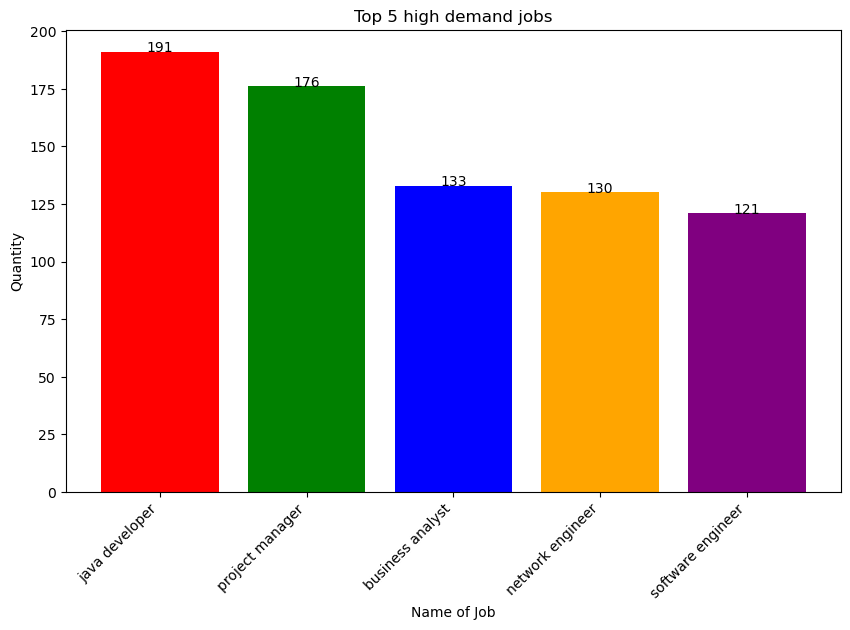

In [15]:
top5 = df['cleaned_jobtitle'].value_counts().nlargest(5).tolist()
labels = df['cleaned_jobtitle'].value_counts().nlargest(5).index.tolist()

print("Top 5 counts:", top5)
print("Top 5 labels:", labels)

import matplotlib.pyplot as plt

def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], str(y[i]), ha="center")

skillslabel = [str(label) for label in labels] 
job_top5 = top5

plt.figure(figsize=(10, 6))

plt.bar(skillslabel, job_top5, color=['red', 'green', 'blue', 'orange', 'purple'])

addlabels(skillslabel, job_top5)

plt.title("Top 5 high demand jobs")
plt.xlabel('Name of Job')
plt.ylabel('Quantity')

plt.xticks(rotation=45, ha='right') 
plt.show()


In [16]:
df.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,cleaned_jobtitle
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,"Atlanta, GA",AUTOMATION TEST ENGINEER,SEE BELOW,automation test engineer
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo...",information security engineer
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,"Enterprise Solutions Architecture, business in...",business solutions architect
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,"Configuration Management, Developer, Linux, Ma...",devops engineer
5,https://www.dice.com/jobs/detail/SAP-FICO-Arch...,Yash Technologies,"Full Time, Permanant",We are looking for a Senior SAP FICO Architect...,"Chicago, IL",SAP FICO Architect,"FICO, AR, AP, Asset Management, HAHA",sap fico architect


# TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'cleaned_jobtitle' is the column containing cleaned job titles
corpus = df['cleaned_jobtitle'].tolist()

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

print(X.shape)
analyze = vectorizer.build_analyzer()
features = vectorizer.get_feature_names()


(21804, 4904)


# clustering using Kmean

In [18]:
from sklearn.cluster import KMeans

# Assuming 'x' is your feature matrix
# Replace 'x' with your actual feature matrix

# Initialize an empty list to store the WCSS values
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=600, n_init=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


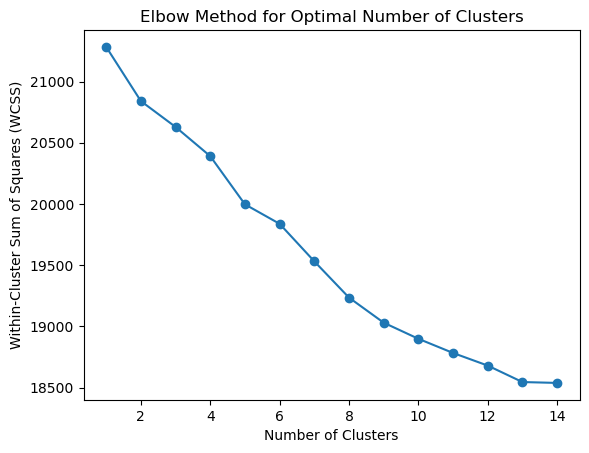

In [19]:
#plotting the graph
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [20]:
true_k = 15
model = KMeans(n_clusters=true_k, init='k-means++', random_state=42, max_iter=600, n_init=1)
pred = model.fit_predict(X)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()


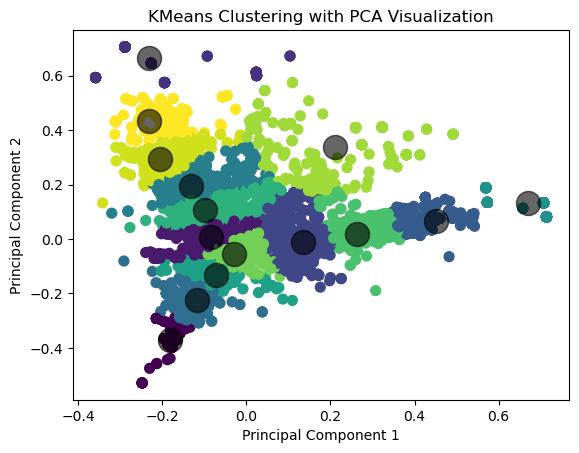

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Use PCA for dimensionality reduction
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X.toarray())

# Create and fit KMeans model
kmeans = KMeans(n_clusters=true_k, init='k-means++', random_state=42, max_iter=600, n_init=1)
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

# Scatter plot
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6)

plt.title('KMeans Clustering with PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [22]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(Y_sklearn, prediction)
print(" KMeans scaled Silhouette Score:", silhouette_avg)


 KMeans scaled Silhouette Score: 0.5006775403620116


In [23]:
#get the cluster and the top 10 frequent words in each cluster

def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense())
    df['cluster'] = clusters

    for i, r in df.groupby('cluster').mean().iterrows():
        print('\nCluster {}'.format(i))
        top_keywords = [labels[t] for t in np.argsort(r)[-n_terms:]][::-1]
        print(', '.join(top_keywords))

#  'X' is your TF-IDF matrix, 'pred' is the cluster predictions, 'features' is the feature names
# Replace 'X', 'pred', and 'features' with your actual data
get_top_keywords(X, pred, features, 12)



Cluster 0
manager, project, technical, program, product, senior, sr, coordinator, development, infrastructure, engineering, account

Cluster 1
consultant, manager, specialist, technology, developer, technical, sap, senior, engineer, oracle, director, recruiter

Cluster 2
analyst, security, systems, programmer, senior, qa, sr, quality, information, financial, assurance, sap

Cluster 3
proposal, writer, mclean, manager, va, contract, specialist, technicalwriter, coordinator, lead, business, analyst

Cluster 4
developer, net, web, senior, sr, software, end, front, application, ui, android, stack

Cluster 5
java, developer, senior, sr, core, engineer, full, stack, j2ee, lead, software, end

Cluster 6
data, big, analyst, architect, scientist, engineer, senior, warehouse, developer, modeler, analytics, sr

Cluster 7
engineer, software, senior, systems, devops, sr, security, test, development, qa, automation, linux

Cluster 8
network, administrator, engineer, systems, system, senior, sr, dat

# classification

In [24]:
label = []
for i in df['cleaned_jobtitle'].values:
    vec = vectorizer.transform([i])
    pred = model.predict(vec)[0]  # Retrieve the first (and only) element of the prediction array
    if pred == 0:
        label.append("Project Management")
    elif pred == 1:
        label.append(" Technical Development, Technology Consulting")
    elif pred == 2:
        label.append("Technology Analysis")
    elif pred == 3:
        label.append("Proposal Writer")
    elif pred == 4:
        label.append("Web Developer")
    elif pred == 5:
        label.append("Senior Java Developer")
    elif pred == 6:
        label.append("Analyst")
    elif pred == 7:
        label.append("Software Engineering")
    elif pred==8:
        label.append("Senior Network/Systems Engineer")
    elif pred==9:
        label.append("Cloud Solution Architect")
    elif pred==10:
        label.append("Business Systems Analyst")
    elif pred==11:
        label.append("UX/UI Designer/Graphic Designer")
    elif pred==12:
        label.append("IT Support Specialist")
    elif pred==13:
        label.append(" Technical Architect & Lead Engineer")
    elif pred==14:
        label.append("Desktop Service Technician")
    else:
        label.append("Graphic Designer")
df["label"] = label
df.head(5)
#Assuming X is your data used for clustering
print("Number of features in X:", X.shape[1])


Number of features in X: 4904


In [25]:
df


,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,cleaned_jobtitle,label
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,"Atlanta, GA",AUTOMATION TEST ENGINEER,SEE BELOW,automation test engineer,Software Engineering
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo...",information security engineer,Software Engineering
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,"Enterprise Solutions Architecture, business in...",business solutions architect,Cloud Solution Architect
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,"Configuration Management, Developer, Linux, Ma...",devops engineer,Software Engineering
5,https://www.dice.com/jobs/detail/SAP-FICO-Arch...,Yash Technologies,"Full Time, Permanant",We are looking for a Senior SAP FICO Architect...,"Chicago, IL",SAP FICO Architect,"FICO, AR, AP, Asset Management, HAHA",sap fico architect,Cloud Solution Architect
...,...,...,...,...,...,...,...,...,...
21994,https://www.dice.com/jobs/detail/Empower--Admi...,SNW Infotech,"Contract Corp-To-Corp, Contract Independent, C...","• Hands on experience in CSV, Performing I...","Foster City, CA",Empower Administrator,"Empower3, LIMPS",empower administrator,Senior Network/Systems Engineer
21995,https://www.dice.com/jobs/detail/Web-Designer-...,IAC Publishing,Full Time,Company Description We are searching for a ta...,"Oakland, CA",Web Designer,"UI/UX mobile apps, interaction design, digital...",web designer,UX/UI Designer/Graphic Designer
21996,https://www.dice.com/jobs/detail/Senior-Front-...,Omega Solutions Inc,Full Time,CONTACT - priya@omegasolutioninc.com / 408-45...,"San Francisco, CA",Senior Front End Web Developer - Full Time at ...,"JavaScript, HTML5, CSS3, Bootstrap, AJAX, Reac...",senior front end web developer full time visa,Web Developer
21997,https://www.dice.com/jobs/detail/QA-Analyst-Sa...,San Francisco Health Plan,Full Time,Do you take pride in your work knowing that th...,"San Francisco, CA",QA Analyst,"SDLC, ALM, SQL, T-SQL, RedGate, Team Foundatio...",qa analyst,Technology Analysis


In [26]:
jobSkills = []
for i in df["skills"]:
    jobSkills.append(i.lower())

Xclass = vectorizer.fit_transform(jobSkills)
X_train, X_test, y_train, y_test = train_test_split(Xclass, label, test_size=0.2, random_state=42)



# logistic Regression


In [27]:
cparamrange = [0.1, 0.5, 0.8, 1, 2]
trainAcc = []
testAcc = []

for i in cparamrange:
    # Correcting typo in the class name: LogisticRegrression -> LogisticRegression
    lrg = LogisticRegression(penalty='l2', C=i, random_state=42)
    
    # Correcting typo: y-trrain -> y_train
    lrg.fit(X_train, y_train)
    
    # Correcting attribute names: predtrain -> pred_train
    lrg_pred_train = lrg.predict(X_train)
    lrg_pred_test = lrg.predict(X_test)
    
    # Correcting function name: accuracy_score
    train_acc = accuracy_score(y_train, lrg_pred_train)
    test_acc = accuracy_score(y_test, lrg_pred_test)
    
    trainAcc.append(train_acc)
    testAcc.append(test_acc)

    

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [28]:
from sklearn.metrics import classification_report

lrg = LogisticRegression(penalty='l2', C=i, random_state=42)
lrg.fit(X_train, y_train)
lrg_pred = lrg.predict(X_test)
lrg_acc = accuracy_score(y_test, lrg_pred)
print("Accuracy of logistic regression: " + str(lrg_acc))
print(classification_report(y_test, lrg_pred))  # Correcting typo: clssification_report -> classification_report


Accuracy of logistic regression: 0.5443705572116487
                                               precision    recall  f1-score   support

          Technical Architect & Lead Engineer       0.54      0.16      0.25       162
 Technical Development, Technology Consulting       0.49      0.72      0.58      1320
                                      Analyst       0.57      0.42      0.48       173
                     Business Systems Analyst       0.62      0.43      0.51       167
                     Cloud Solution Architect       0.64      0.34      0.45       232
                   Desktop Service Technician       0.71      0.45      0.55        67
                        IT Support Specialist       0.51      0.27      0.35       116
                           Project Management       0.73      0.57      0.64       260
                              Proposal Writer       0.00      0.00      0.00         1
                        Senior Java Developer       0.66      0.59      0.62 

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

# Support Vector Machines

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X contains your feature matrix and label contains the corresponding labels
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
clf = SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9633111671634946


In [30]:
from sklearn import svm
from sklearn.metrics import accuracy_score

Csvm = [0.1, 0.5, 0.8, 1, 1.5, 2, 2.5, 3, 3.5]
trainAcc = []
testAcc = []

for c in Csvm:
    modelsvm = svm.SVC(C=c, gamma=1, kernel='rbf')
    svmfit = modelsvm.fit(X_train, y_train)
    Y_predTrain = modelsvm.predict(X_train)
    Y_predTest = modelsvm.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))


In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm = SVC(C=5, gamma=1, kernel='rbf', probability=True)
svm_fit = svm.fit(X_train, y_train)
svm_predictions = svm_fit.predict(X_test)
svm_acc = accuracy_score(y_test, svm_predictions)

print('Accuracy of SVM:', svm_acc)
print(classification_report(y_test, svm_predictions))


Accuracy of SVM: 0.9688144920889704
                                               precision    recall  f1-score   support

          Technical Architect & Lead Engineer       0.97      0.99      0.98       162
 Technical Development, Technology Consulting       0.97      0.95      0.96      1320
                                      Analyst       0.95      0.98      0.96       173
                     Business Systems Analyst       0.92      0.99      0.95       167
                     Cloud Solution Architect       0.99      0.99      0.99       232
                   Desktop Service Technician       1.00      0.99      0.99        67
                        IT Support Specialist       0.94      1.00      0.97       116
                           Project Management       0.97      0.97      0.97       260
                              Proposal Writer       1.00      1.00      1.00         1
                        Senior Java Developer       0.98      0.98      0.98       204
      

# cosin similarity

In [32]:
#cos = []
#labelData = df[df['label'] == output[0]]  # Assuming 'output[0]' contains the predicted label

#for index, row in labelData.iterrows():  # Corrected variable name to labelData
   #skillVec = vectorizer.transform(skills)
   #cos_lib = cosine_similarity(skillVec, pred)  # Corrected variable name to skillVec
    #cos.append(cos_lib[0][0])

#labelData['cosine_similarity'] = cos


# Final job Recommendation (results)

# get user input

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Instantiate and train an SVM model
X = vectorizer.transform(df['skills'].str.lower())  
y = df['label']  

svm = SVC(kernel='linear')
svm.fit(X, y)


SVC(kernel='linear')

In [35]:
userInput = input('Enter your skills: ')
pred = vectorizer.transform([userInput.lower()])

output = svm.predict(pred)
print("You may look into " + output[0] + ' jobs')
print("Here is a list of jobs under " + output[0])

cos = []
labelData = df[df['label'] == output[0]]

for index, row in labelData.iterrows():
    skills = [row['skills']]
    skillVec = vectorizer.transform(skills)
    
    cos_lib = cosine_similarity(skillVec, pred)
    cos.append(cos_lib[0][0])

labelData['cosine_similarity'] = cos
top_5 = labelData.sort_values("cosine_similarity", ascending=False)[['advertiserurl', 'company', 'employmenttype_jobstatus', 'jobdescription', 'joblocation_address', 'jobtitle', 'skills', 'cleaned_jobtitle', 'label']]
top_5.head(5)


Enter your skills: Software development, Python, JavaScript
You may look into Software Engineering jobs
Here is a list of jobs under Software Engineering


C:\Users\PC\AppData\Local\Temp\ipykernel_15844\2242281348.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelData['cosine_similarity'] = cos


,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,cleaned_jobtitle,label
9998,https://www.dice.com/jobs/detail/Software-Engi...,Seed Development,Full Time,Seed Development has an exciting opportunity f...,"Allentown, PA",Software Engineer,Software Development,software engineer,Software Engineering
10238,https://www.dice.com/jobs/detail/Software-Engi...,Seed Development,Full Time,Seed Development has an exciting opportunity f...,"Allentown, PA",Software Engineer,Software Development,software engineer,Software Engineering
18998,https://www.dice.com/jobs/detail/Software-Engi...,Seed Development,Full Time,Seed Development has an exciting opportunity f...,"Allentown, PA",Software Engineer,Software Development,software engineer,Software Engineering
18532,https://www.dice.com/jobs/detail/Software-Engi...,Seed Development,Full Time,Seed Development has an exciting opportunity f...,"Allentown, PA",Software Engineer,Software Development,software engineer,Software Engineering
18458,https://www.dice.com/jobs/detail/Java-%2526-Ja...,"NetScout Systems, Inc.",Full Time,"NETSCOUT Systems, Inc., in our Colorado Spring...","Colorado Springs, CO",Java & JavaScript Software Development Engineer,Java & JavaScript Software Development Engineer,java javascript software development engineer,Software Engineering


In [36]:
userInput = input('Enter your skills: ')
pred = vectorizer.transform([userInput.lower()])

output = svm.predict(pred)
print("You may look into " + output[0] + ' jobs')
print("Here is a list of jobs under " + output[0])

cos = []
labelData = df[df['label'] == output[0]]

for index, row in labelData.iterrows():
    skills = [row['skills']]
    skillVec = vectorizer.transform(skills)
    
    cos_lib = cosine_similarity(skillVec, pred)
    cos.append(cos_lib[0][0])

labelData['cosine_similarity'] = cos
top_5 = labelData.sort_values("cosine_similarity", ascending=False)[['advertiserurl', 'company', 'employmenttype_jobstatus', 'jobdescription', 'joblocation_address', 'jobtitle', 'skills', 'cleaned_jobtitle', 'label']]
top_5.head(5)


Enter your skills: Marketing, communication, social media
You may look into  Technical Development, Technology Consulting jobs
Here is a list of jobs under  Technical Development, Technology Consulting


C:\Users\PC\AppData\Local\Temp\ipykernel_15844\2242281348.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelData['cosine_similarity'] = cos


,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,cleaned_jobtitle,label
18851,https://www.dice.com/jobs/detail/Social-Media-...,Ascendo Resources,Full Time,"Social Media Manager Direct Hire, On Site, Wes...","West Palm Beach, FL",Social Media Manager,"Social Media marketing, Hootsuite, Sprout Social",social media manager,"Technical Development, Technology Consulting"
1138,https://www.dice.com/jobs/detail/x2-Marketing-...,Systematix Technology Consultants Inc,"Contract Independent, 6 Months+","***NOTE: Must be able to work independently, n...","Framingham, MA",x2 Marketing Communication Specialists,"Marketing, Communication, Digital, Software, P...",x2 marketing communication specialists,"Technical Development, Technology Consulting"
19727,https://www.dice.com/jobs/detail/e%2526%252345...,SCIITS,"Full Time, Contract Corp-To-Corp, Contract Ind...","Hi, ...","Irving, TX",e-Commerce and Social Analytics,"social media , Google Analytics, Microsoft Exc...",e-commerce social analytics,"Technical Development, Technology Consulting"
21751,https://www.dice.com/jobs/detail/Marketing-Coo...,BayOne Solutions,Contract W2,Marketing Coordinator Job Duties:• Implements ...,"San Bruno, CA",Marketing Coordinator,marketing,marketing coordinator,"Technical Development, Technology Consulting"
3484,https://www.dice.com/jobs/detail/Evening-Socia...,"EdgeCast Networks, Inc.",Full Time,Company DescriptionThe Huffington Post is a Pu...,"New York, NY",Evening Social Editor,"writing experience, social media, editorial se...",evening social editor,"Technical Development, Technology Consulting"


In [40]:
userInput = input('Enter your skills: ')
pred = vectorizer.transform([userInput.lower()])

output = svm.predict(pred)
print("You may look into " + output[0] + ' jobs')
print("Here is a list of jobs  " + output[0])

cos = []
labelData = df[df['label'] == output[0]]

for index, row in labelData.iterrows():
    skills = [row['skills']]
    skillVec = vectorizer.transform(skills)
    
    cos_lib = cosine_similarity(skillVec, pred)
    cos.append(cos_lib[0][0])

labelData['cosine_similarity'] = cos
top_5 = labelData.sort_values("cosine_similarity", ascending=False)[['advertiserurl', 'company', 'employmenttype_jobstatus', 'jobdescription', 'joblocation_address', 'jobtitle', 'skills', 'cleaned_jobtitle', 'label']]
top_5.head(5)


Enter your skills: Graphic design, Photoshop, Illustrator
You may look into UX/UI Designer/Graphic Designer jobs
Here is a list of jobs  UX/UI Designer/Graphic Designer


C:\Users\PC\AppData\Local\Temp\ipykernel_15844\1828687664.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelData['cosine_similarity'] = cos


,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,cleaned_jobtitle,label
6885,https://www.dice.com/jobs/detail/Senior-Visual...,Prestige Staffing,Full Time,Senior Visual DesignerSkills: Ability to work ...,"Atlanta, GA",Senior Visual Designer,Photoshop and Illustrator,senior visual designer,UX/UI Designer/Graphic Designer
21069,https://www.dice.com/jobs/detail/Graphic-Desig...,Nelson Technology,"C2H W2, 3 MTH CTH","Santa Rosa, CA3 months Contract to hireCompens...","Santa Rosa, CA",Graphic Designer,"Graphic Designer, Photoshop, Illustrator, Adob...",graphic designer,UX/UI Designer/Graphic Designer
21450,https://www.dice.com/jobs/detail/UX-Designer-I...,Innominds Software,"Full Time, Contract Corp-To-Corp, Contract Ind...","Hi, Please find the below job description and ...","San Mateo, CA",UX Designer,Adobe Photoshop and Illustrator,ux designer,UX/UI Designer/Graphic Designer
8250,https://www.dice.com/jobs/detail/Senior-Packag...,Amerit Consulting,"Full Time, Contract W2, 3 months",Company Overview: Creating value by bringing ...,"Wayne, NJ",Senior Packaging Designer,"Photoshop, Illustrator, InDesign",senior packaging designer,UX/UI Designer/Graphic Designer
20395,https://www.dice.com/jobs/detail/UI%2526%25234...,Sohum Inc.,"C2H Corp-To-Corp, C2H Independent, C2H W2",Our client in south Bay Area is actively looki...,"San Jose, CA",UI/UX Designer,"UX, Graphic, designer, photoshop, illustrator,...",ui/ux designer,UX/UI Designer/Graphic Designer
